In [9]:
urls=['https://oss.open-digger.cn/github/pytorch/pytorch/openrank.json',
    'https://oss.open-digger.cn/github/vllm-project/vllm/openrank.json',
    'https://oss.open-digger.cn/github/huggingface/transformers/openrank.json',
    'https://oss.open-digger.cn/github/sgl-project/sglang/openrank.json',
    'https://oss.open-digger.cn/github/ray-project/ray/openrank.json',
    ]

In [10]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta



# 生成目标月份列表（从2024-09到2025-08）
def generate_target_months():
    start_date = datetime(2024, 9, 1)
    end_date = datetime(2025, 8, 1)
    
    current_date = start_date
    months = []
    
    while current_date <= end_date:
        months.append(current_date.strftime("%Y-%m"))
        # 移动到下个月
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)
    
    return months

target_months = generate_target_months()

# 下载并处理每个URL的数据
all_data_lists = []

for url in urls:
    try:
        # 下载JSON数据
        response = requests.get(url)
        response.raise_for_status()  # 检查请求是否成功
        data = response.json()
        
        # 提取目标月份的数据
        monthly_data = []
        for month in target_months:
            # 假设JSON数据是一个字典，键是月份标签，值是对应的数据
            # 如果数据结构不同，需要调整这部分代码
            value = data.get(month, 0)  # 如果月份不存在，默认为0
            monthly_data.append(value)
        
        all_data_lists.append(monthly_data)
        
    except requests.exceptions.RequestException as e:
        print(f"下载 {url} 时出错: {e}")
        # 如果下载失败，用None填充数据
        all_data_lists.append([None] * len(target_months))
    except json.JSONDecodeError as e:
        print(f"解析 {url} 的JSON时出错: {e}")
        all_data_lists.append([None] * len(target_months))


In [11]:
labels=['PyTorch','vLLM','Transformers','SGLang','Ray']

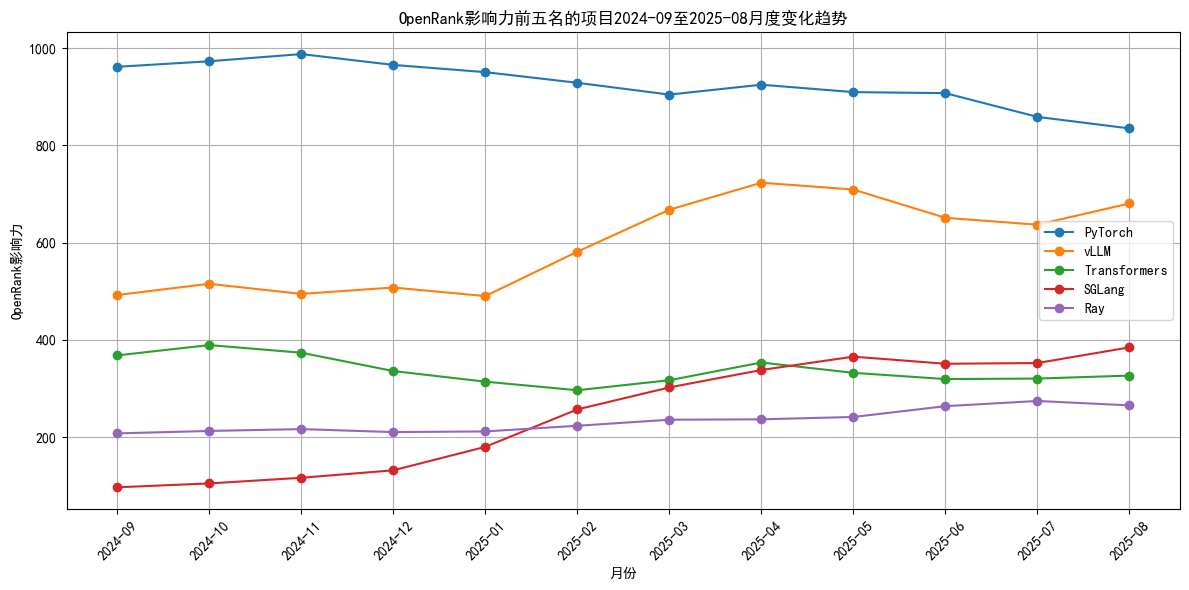

In [12]:

# 绘制折线图
plt.figure(figsize=(12, 6))

for i, data_list in enumerate(all_data_lists):
    # 处理可能的None值（下载失败的情况）
    processed_data = [0 if x is None else x for x in data_list]
    plt.plot(target_months, processed_data, marker='o', label=labels[i])
    
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.title('OpenRank影响力前五名的项目2024-09至2025-08月度变化趋势')
plt.xlabel('月份')
plt.ylabel('OpenRank影响力')
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示
plt.grid(True)
plt.legend()
plt.tight_layout()  # 自动调整子图参数，防止标签被截断
plt.show()